In [4]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [6]:
df=pd.read_csv("C:/Somduity/Python/glassdata.csv")
df.sample(10)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
81,82,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.0,0.00,2
44,45,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.0,0.30,1
90,91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2
157,158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3
131,132,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.0,0.10,2
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
42,43,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.0,0.00,1
151,152,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.0,0.00,3
76,77,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.0,0.00,2


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [7]:
#checking for null-- No null found
df.isnull().sum()

ID             0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
TypeOfGlass    0
dtype: int64

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [8]:
df["TypeOfGlass"]=df.TypeOfGlass.astype('category')

In [9]:
df.sample(10)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
157,158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.0,3
134,135,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.00,0.0,2
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
146,147,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.0,3
25,26,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.0,1
98,99,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.0,2
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.0,1
213,214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7
86,87,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.0,2
26,27,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.0,1


In [10]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


1.5277206 15.131800000000002 3.9648000000000003 3.0018000000000007 74.53699999999999 2.5778000000000048 14.643600000000001 2.1363000000000025 0.3487


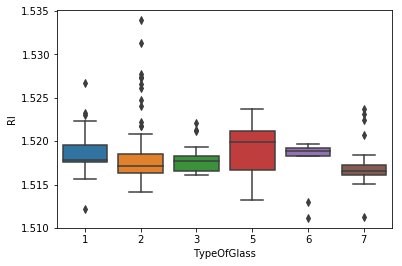

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.boxplot( y="RI", x="TypeOfGlass",data = df )
a1,a2,a3,a4,a5,a6,a7,a8,a9=df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]].quantile(0.99)
print(a1,a2,a3,a4,a5,a6,a7,a8,a9)

    

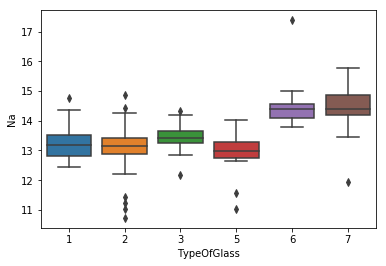

In [21]:
sns.boxplot( y="Na", x="TypeOfGlass",data = df )

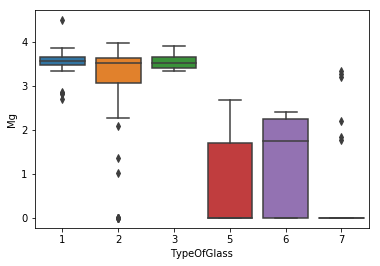

In [33]:
sns.boxplot( y="Mg", x="TypeOfGlass",data = df )


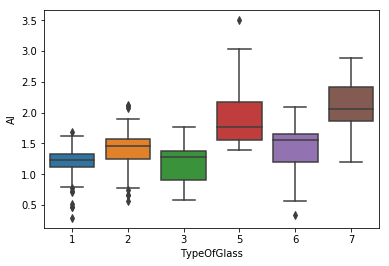

In [38]:

sns.boxplot( y="Al", x="TypeOfGlass",data = df )
    


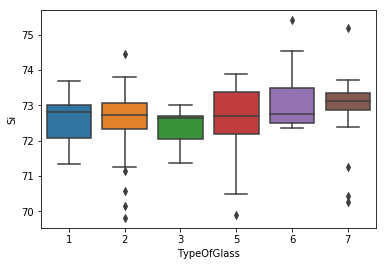

In [39]:
sns.boxplot( y="Si", x="TypeOfGlass",data = df ) 

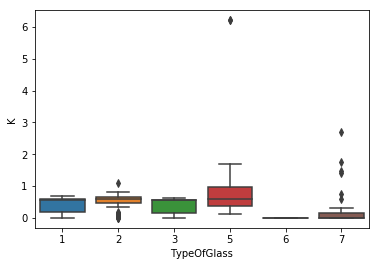

In [40]:
sns.boxplot( y="K", x="TypeOfGlass",data = df )

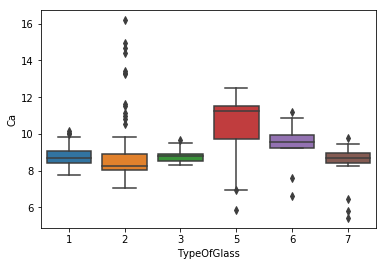

In [45]:
sns.boxplot( y="Ca", x="TypeOfGlass",data = df )

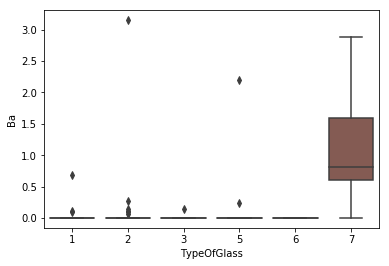

In [44]:
sns.boxplot( y="Ba", x="TypeOfGlass",data = df )

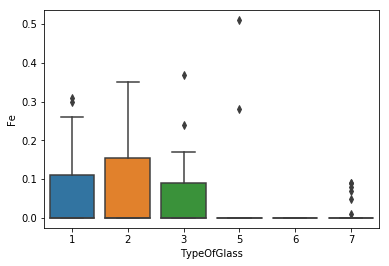

In [47]:
sns.boxplot( y="Fe", x="TypeOfGlass",data = df )

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [129]:
df.var()
df2=df.drop(labels={"RI","Fe"},axis = 1 )
df2



ID             3834.166667
RI                0.000009
Na                0.666841
Mg                2.080540
Al                0.249270
Si                0.599921
K                 0.425354
Ca                2.025366
Ba                0.247227
Fe                0.009494
TypeOfGlass       4.425716
dtype: float64

,ID,Na,Mg,Al,Si,K,Ca,Ba,TypeOfGlass
0,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,2,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,3,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,4,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,5,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
5,6,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
6,7,13.30,3.60,1.14,73.09,0.58,8.17,0.00,1
7,8,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
8,9,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
9,10,13.00,3.60,1.36,72.99,0.57,8.40,0.00,1


In [140]:
df3=df2.drop(labels="ID",axis=1)

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

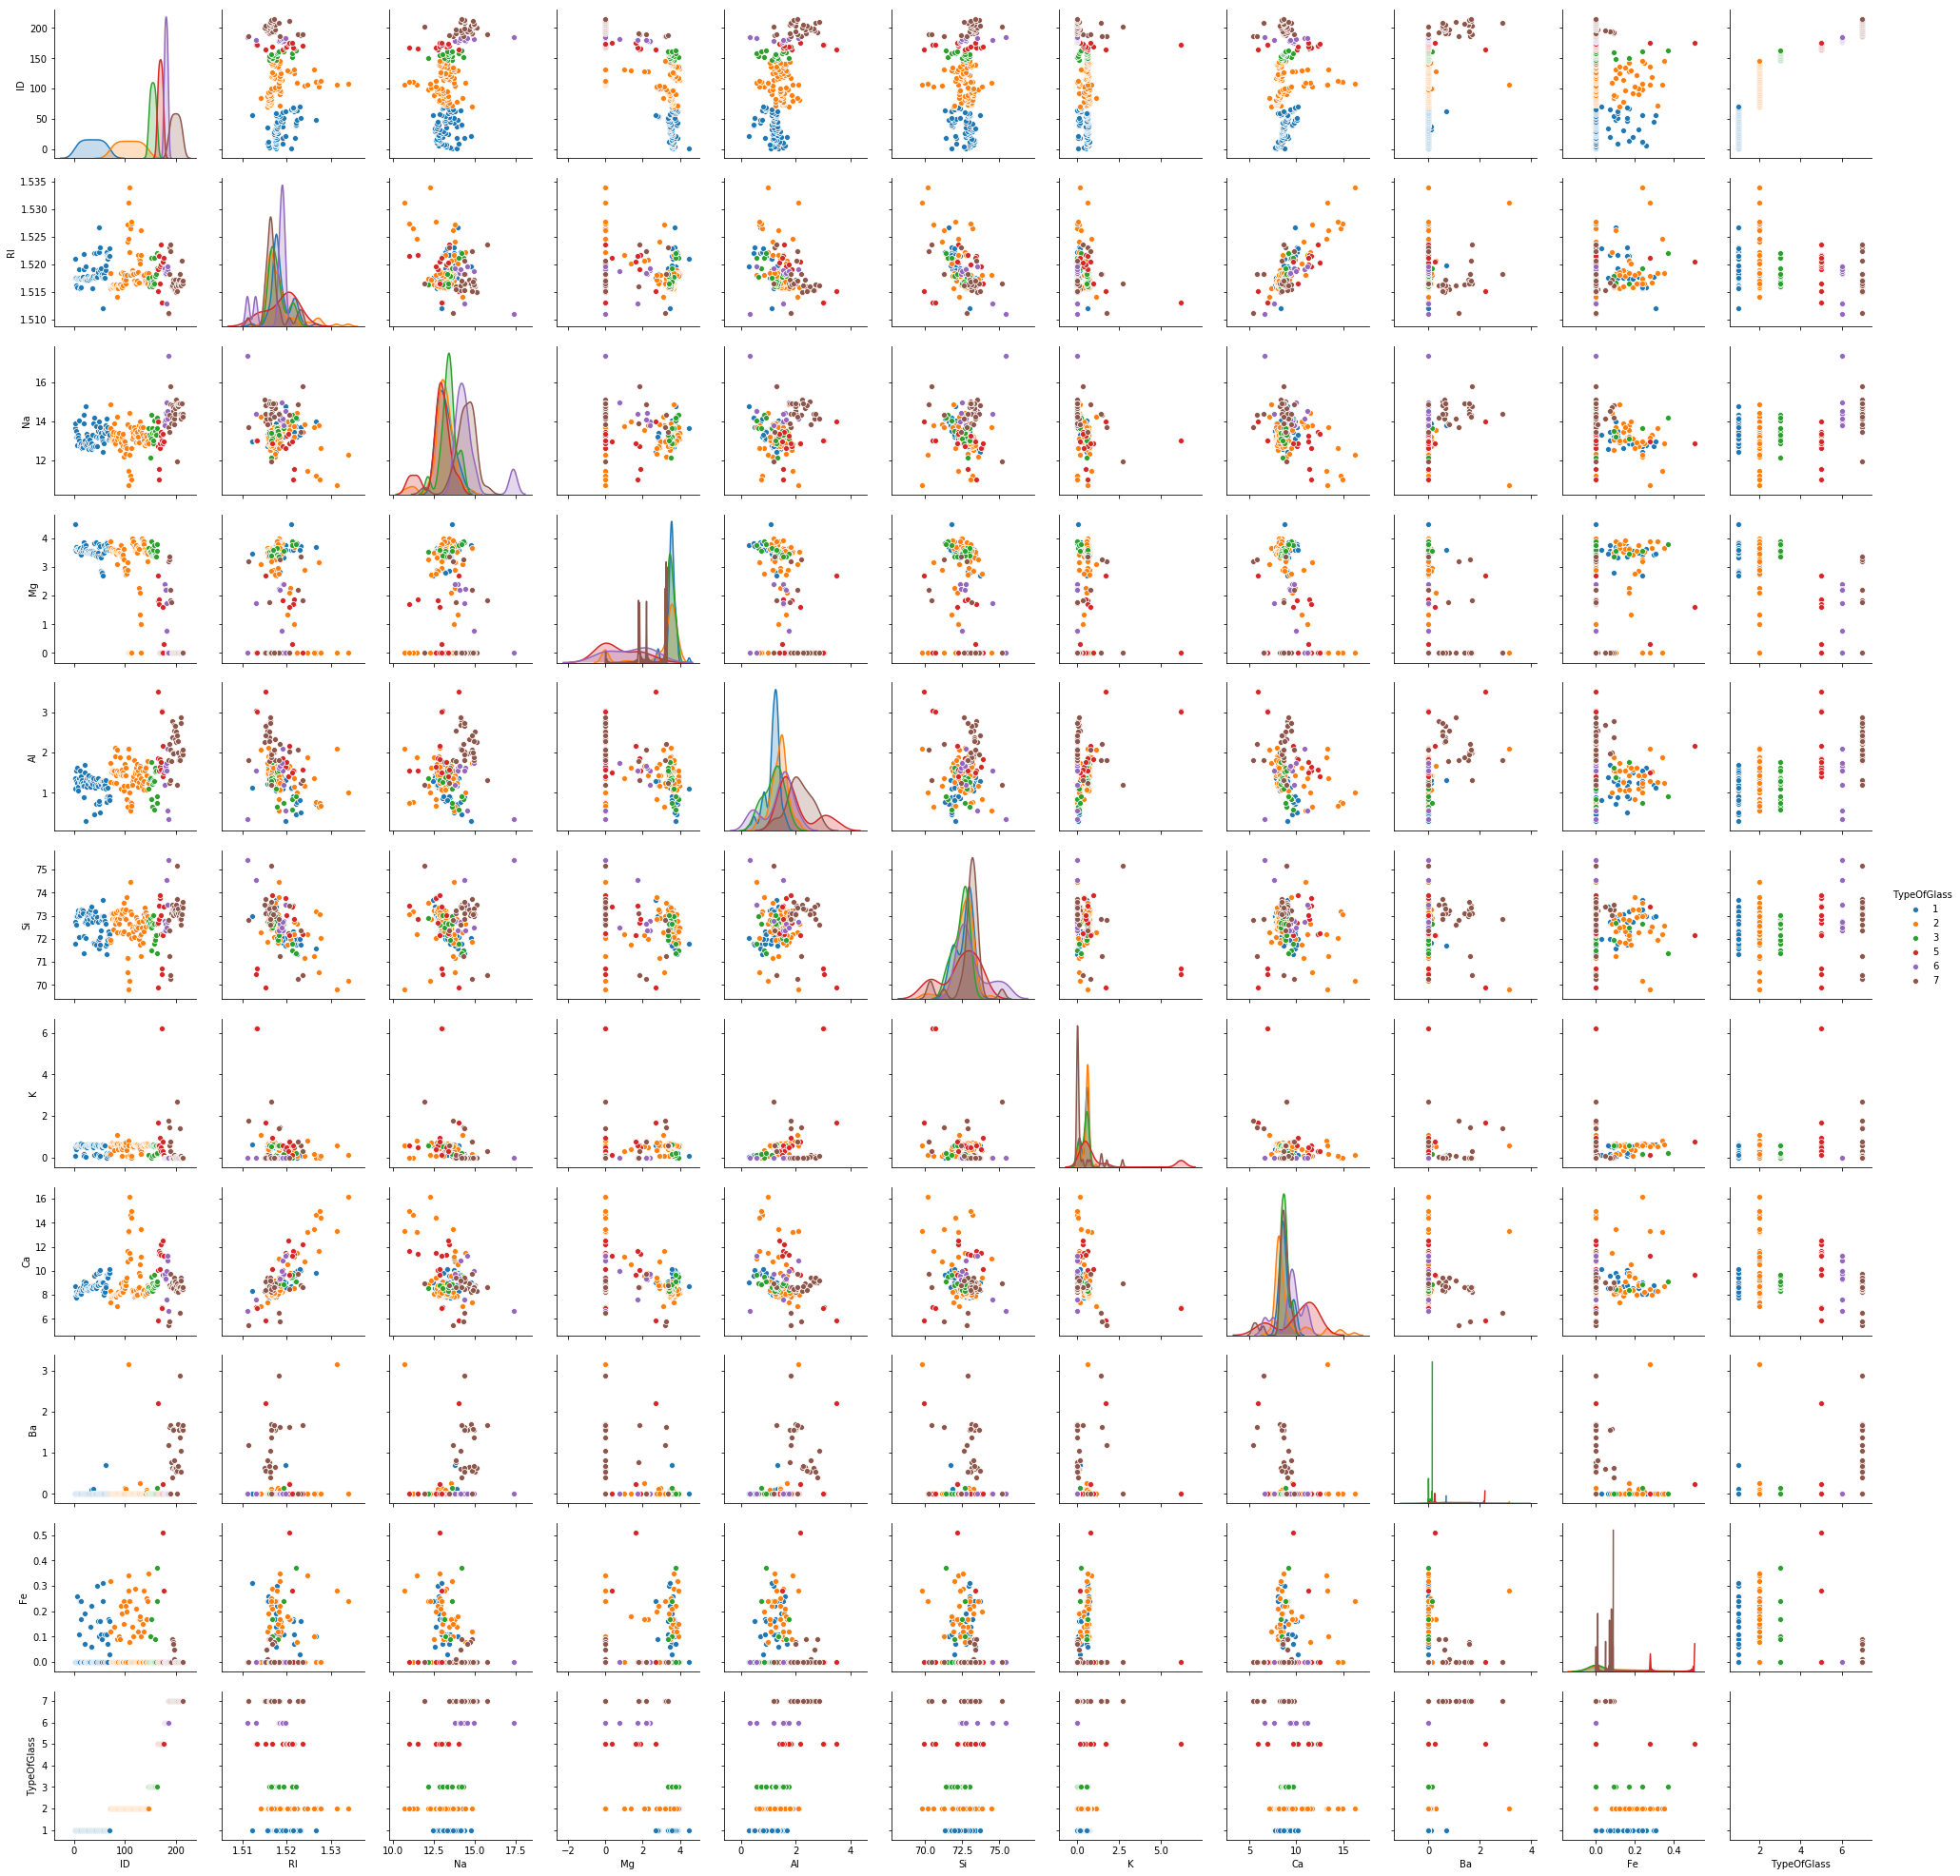

In [141]:
sns.pairplot(df,hue="TypeOfGlass")

In [145]:
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [146]:
df_labels=df["TypeOfGlass"]
y=np.array(df_labels)
df4=df3.drop(labels="TypeOfGlass",axis=1)
df4_z=df4.apply(zscore)
x=np.array(df4_z)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
NNH1=KNeighborsClassifier(n_neighbors=3,weights="distance")
NNH1.fit(x_train,y_train)
predict1=NNH1.predict(x_test)
NNH1.score(x_test,y_test)
NNH2=KNeighborsClassifier(n_neighbors=6,weights="distance")
NNH2.fit(x_train,y_train)
predict2=NNH1.predict(x_test)
NNH2.score(x_test,y_test)
NNH3=KNeighborsClassifier(n_neighbors=9,weights="distance")
NNH3.fit(x_train,y_train)
predict3=NNH1.predict(x_test)
NNH3.score(x_test,y_test)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

0.7384615384615385

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

0.7230769230769231

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

0.7076923076923077

In [147]:
print("accuracy score with k=3")
accuracy_score(y_test,predict1)
print("accuracy score with k=6")
accuracy_score(y_test,predict2)
print("accuracy score with k=9")
accuracy_score(y_test,predict3)

accuracy score with k=3


0.7384615384615385

accuracy score with k=6


0.7384615384615385

accuracy score with k=9


0.7384615384615385

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

myList = range(1,20)


cv_scores = []
k_neighbors = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.35395119586296064

0

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

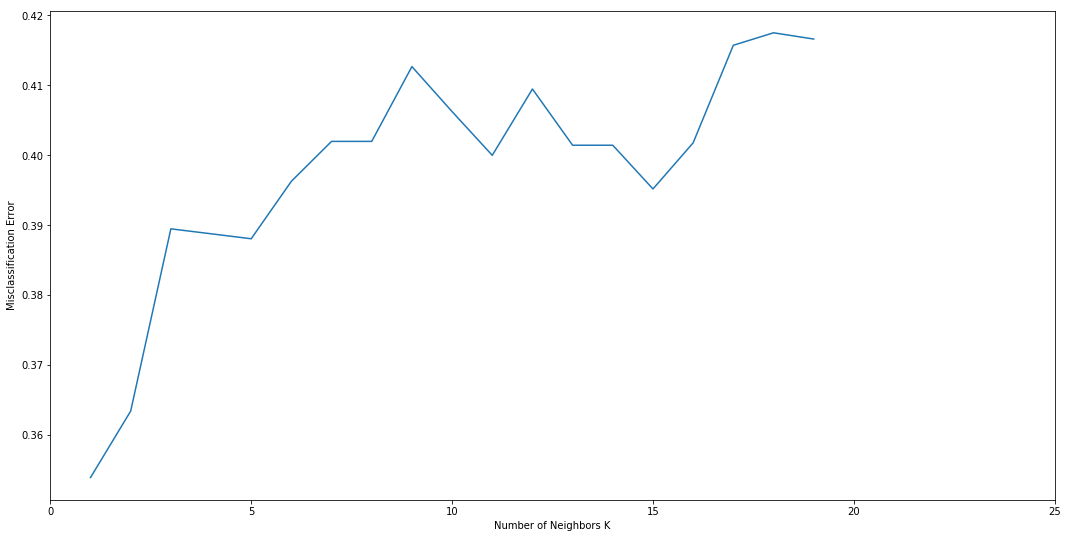

In [156]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)

plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()